<h2>Credit Card Analysis</h2>

<l1>Problem statement</l1>
<ul>
<l2>We need to find out what influences that we need to expand the uses of credit cards for bettter transaction through credit card in near future.
Based on the information given in the dataset we need to predict whether a person will take usage of credit card or not.</l2>
</ul>

<l2>Factors that might affect the usage of credit card<l2>
<ul>
<li>Age</li>
<li>Income</li>
<li>Marital Status</li>
<li>Occupation</li>
<li>Education</li>
<li>EMI</li>
</ul>

<img src="download.jpg" height="550" width="350">

<h2>Importing the necessary Libraries</h2>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
base_dataset=pd.read_excel(r"C:\Users\USER\Downloads\Credit Card.xls")

In [3]:
base_dataset.shape

(30000, 25)

In [4]:
base_dataset.head(6)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [5]:
base_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

<h2>Data PreProcessing</h2>

<l2>Null Value Treatment<l2>

In [6]:
null_value_table=(base_dataset.isna().sum()/base_dataset.shape[0])*100

retained_columns=null_value_table[null_value_table<30].index
drop_columns=null_value_table[null_value_table>30].index

base_dataset.drop(drop_columns,axis=1,inplace=True)

len(base_dataset.isna().sum().index)

cont=base_dataset.describe().columns

cat=[i for i in base_dataset.columns if i not in base_dataset.describe().columns]

for i in cat:
    base_dataset[i].fillna(base_dataset[i].value_counts().index[0],inplace=True)

for i in cont:
    base_dataset[i].fillna(base_dataset[i].median(),inplace=True)

In [7]:
base_dataset.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

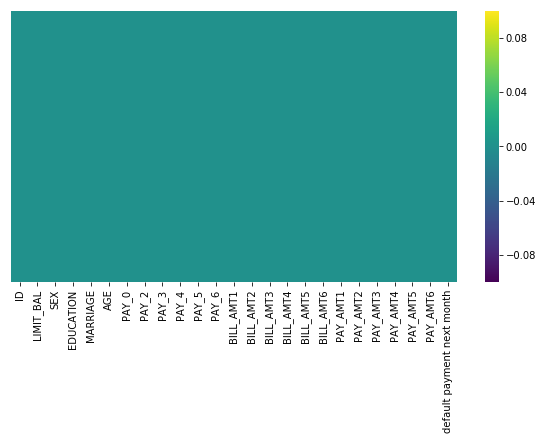

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(base_dataset.isna(),cmap = 'viridis',yticklabels=False)

<l2>Outlier Treatment</l2>

In [9]:
base_dataset.var().sort_values(ascending=False).index[1:10]

Index(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT2', 'PAY_AMT6', 'PAY_AMT3'],
      dtype='object')

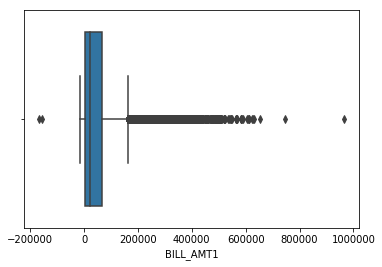

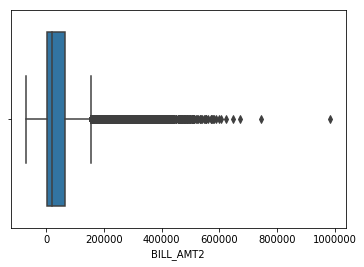

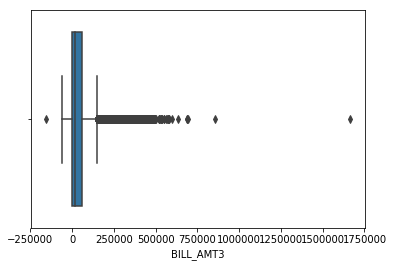

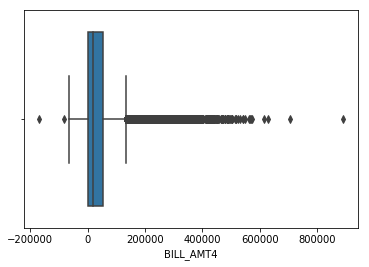

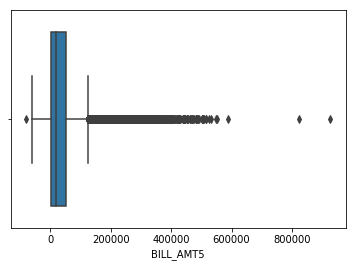

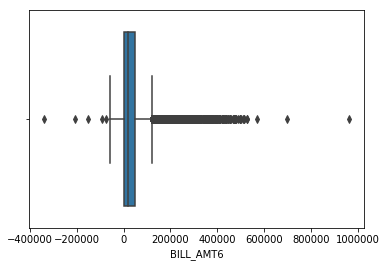

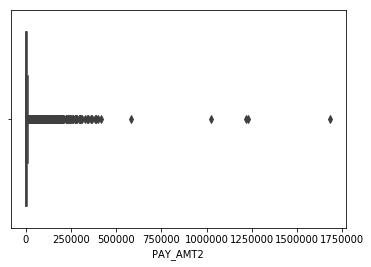

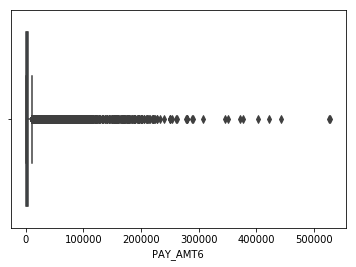

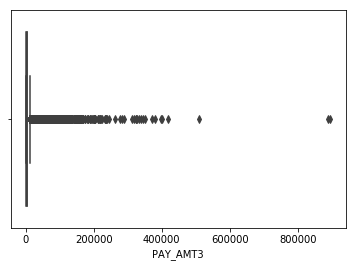

In [10]:
for i in base_dataset.var().sort_values(ascending=False).index[1:10]:
    sns.boxplot(base_dataset[i])
    plt.show()

In [11]:
for i in base_dataset.var().sort_values(ascending=False).index[1:10]:
    x=np.array(base_dataset[i])
    qr1=np.quantile(x,0.25)
    qr3=np.quantile(x,0.75)
    iqr=qr3-qr1
    utv=qr3+(1.5*(iqr))
    ltv=qr1-(1.5*(iqr))
    y=[]
    for p in x:
        if p <ltv or p>utv:
            y.append(np.median(x))
        else:
            y.append(p)
    base_dataset[i]=y

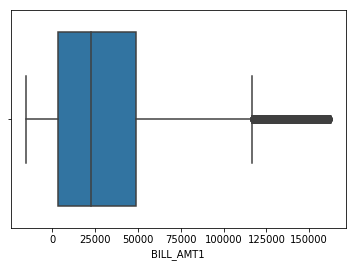

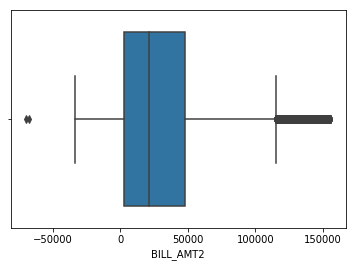

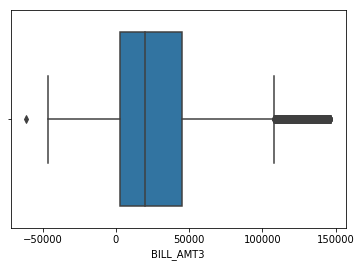

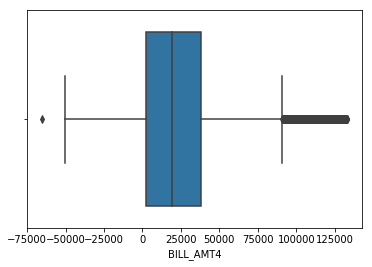

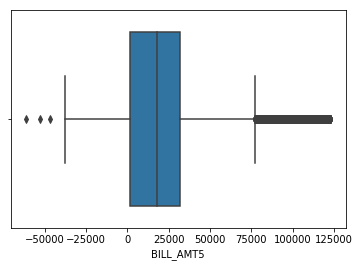

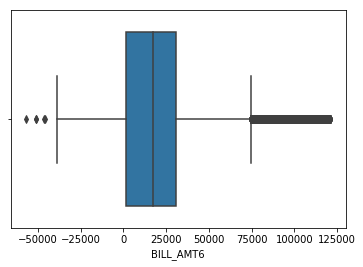

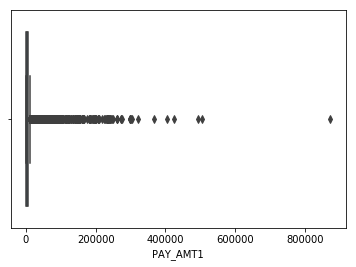

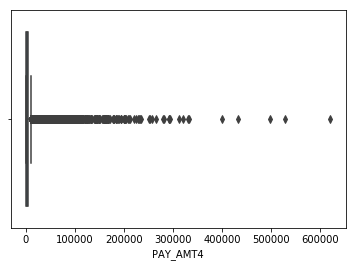

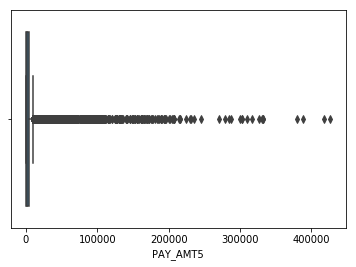

In [12]:
for i in base_dataset.var().sort_values(ascending=False).index[1:10]:
    sns.boxplot(base_dataset[i])
    plt.show()

<l2>Label Encoder Treatment</l2>

In [13]:
from sklearn.preprocessing import LabelEncoder
for i in cat:
    le=LabelEncoder()
    le.fit(base_dataset[i])
    x=le.transform(base_dataset[i])
    base_dataset[i]=x

In [14]:
len(base_dataset.columns)

25

In [15]:
len(base_dataset.mean().index)

25

In [16]:
base_dataset.drop('ID',axis=1,inplace=True)

<l2>Univariate Analysis</l2>

(array([8795., 9838., 3545., 2044., 2008., 1154.,  802.,  584.,  865.,
         365.]),
 array([    0. ,  1124.9,  2249.8,  3374.7,  4499.6,  5624.5,  6749.4,
         7874.3,  8999.2, 10124.1, 11249. ]),
 <a list of 10 Patch objects>)

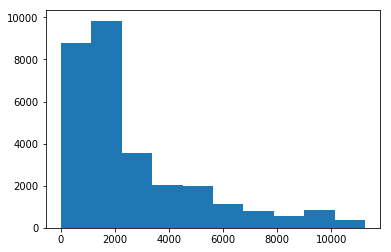

In [17]:
plt.hist(base_dataset['PAY_AMT2'])

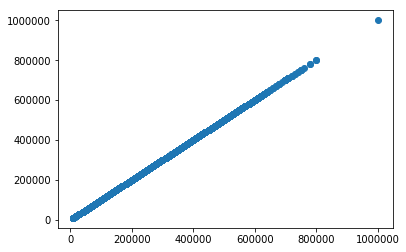

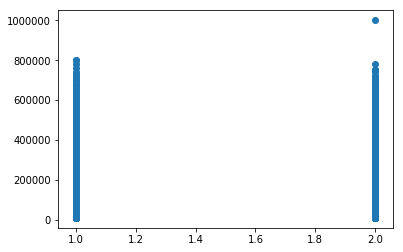

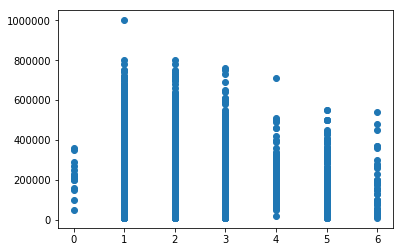

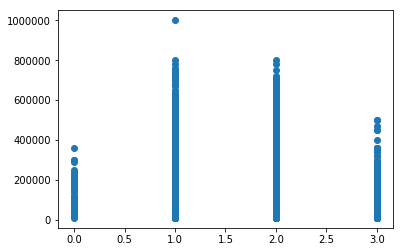

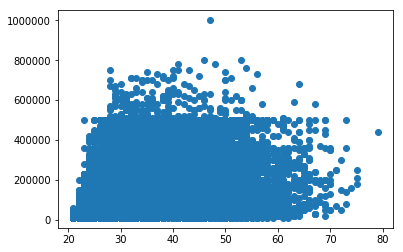

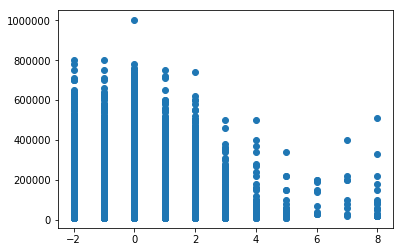

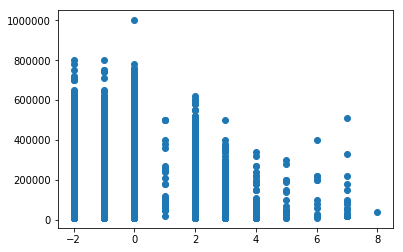

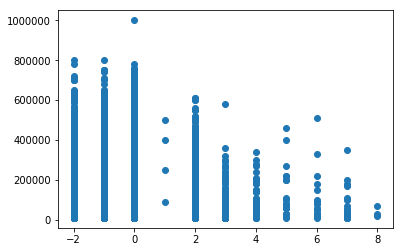

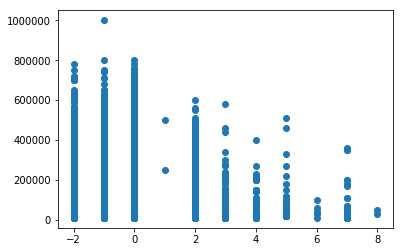

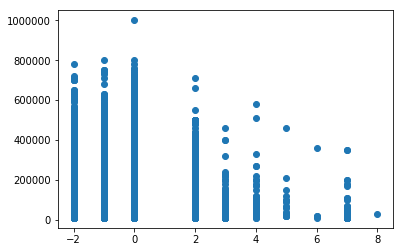

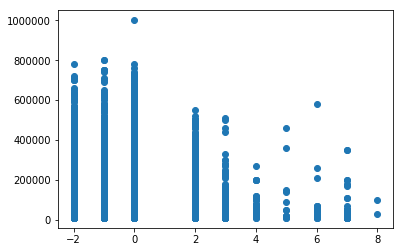

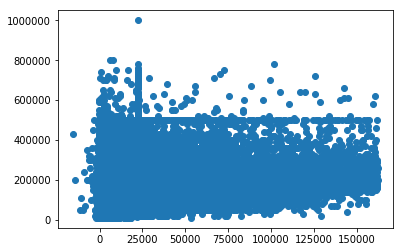

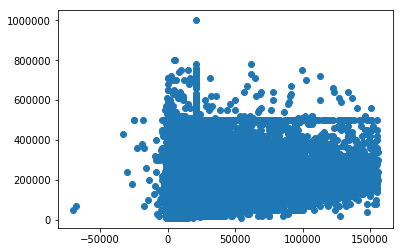

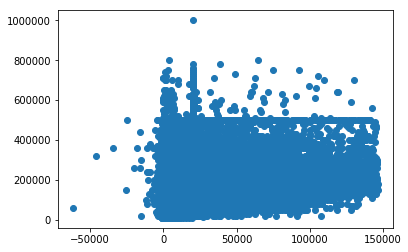

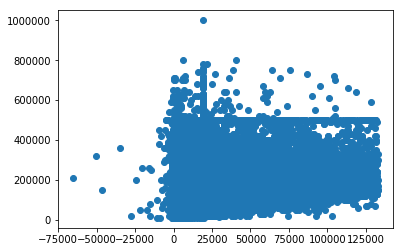

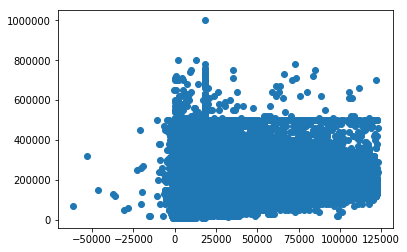

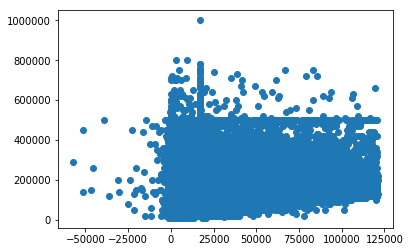

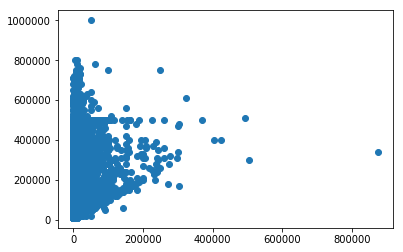

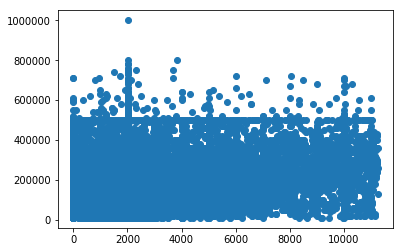

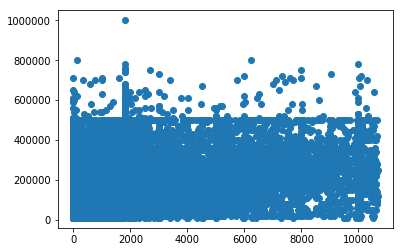

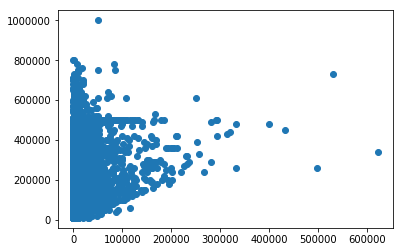

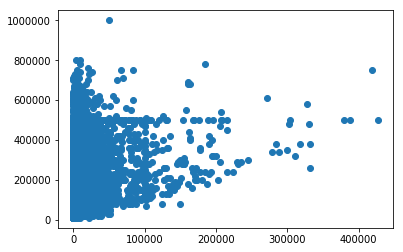

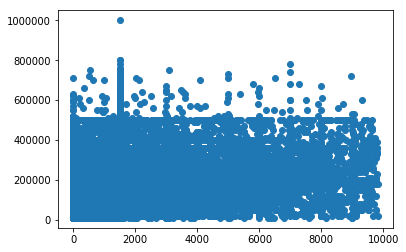

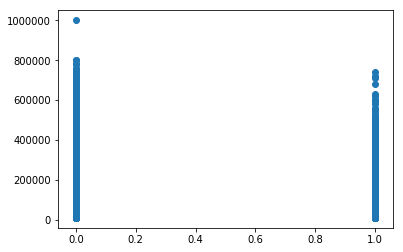

In [18]:
for i in base_dataset.columns:
    plt.scatter(base_dataset[i],base_dataset['LIMIT_BAL'])
    plt.show()

<l2>Model Building</l2>

In [19]:
y=base_dataset['LIMIT_BAL']
x=base_dataset.drop('LIMIT_BAL',axis=1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=121)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24000, 23) (6000, 23) (24000,) (6000,)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn.linear_model import LinearRegression
ln=LinearRegression()
ln.fit(X_train,y_train)
ln.predict(X_test)[1:10]

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,ln.predict(X_test)))

from sklearn.metrics import r2_score
print(r2_score(y_test,ln.predict(X_test)))

from sklearn.metrics import mean_squared_error
print(mean_absolute_error(y_test,ln.predict(X_test)))

(24000, 23) (6000, 23) (24000,) (6000,)
83667.21829303903
0.2941732297610836
83667.21829303903


In [22]:
(abs(ln.predict(X_test)-y_test.values).sum())/X_test.shape[0]

83667.21829303903

In [23]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,ln.predict(X_test)))

83667.21829303903


In [24]:
from sklearn.metrics import r2_score
print(r2_score(y_test,ln.predict(X_test)))

0.2941732297610836


In [25]:
from sklearn.metrics import mean_squared_error
print(mean_absolute_error(y_test,ln.predict(X_test)))

83667.21829303903


In [26]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_absolute_error(y_test,ln.predict(X_test))))

289.252862203711


In [27]:
pd.DataFrame(ln.coef_,X_test.columns)[0].sort_values().head()

EDUCATION                    -31376.002062
MARRIAGE                     -15900.106176
PAY_2                         -9902.729547
PAY_6                         -8437.328945
default payment next month    -7164.529019
Name: 0, dtype: float64

In [28]:
pd.DataFrame(ln.coef_,X_test.columns)[0].sort_values().tail()

PAY_AMT2       4.038020
PAY_AMT3       6.123391
PAY_AMT6       7.104284
SEX         1170.115540
AGE         1806.329972
Name: 0, dtype: float64

<h4>Regularization Concepts: To predict with high accuracy for test data</h4>

In [29]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train) 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(clf.predict(X_test),y_test)

83667.25770366017

In [30]:
import statsmodels.api as sm

In [40]:
mod = sm.OLS(X_train,y_train)

In [47]:
res = mod.fit(X_train.values)
res.summary()

TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'

In [49]:
X_train.dtypes

SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                        int64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                        int64
PAY_AMT5                        int64
PAY_AMT6                      float64
default payment next month      int64
dtype: object

In [50]:
y_train.dtype

dtype('int64')

In [41]:
X_train.shape

(24000, 23)

In [43]:
y_train.shape

(24000,)

In [44]:
X_train.head(11)

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
28938,2,2,1,41,0,0,-1,0,0,0,...,19040.0,19624.0,20152.0,0,2009.0,1500.0,900,993,1100.0,0
21037,1,3,1,37,0,0,0,0,0,0,...,46864.0,46473.0,48191.0,3018,2113.0,3007.0,2000,3000,1500.0,0
15633,2,2,2,27,0,0,0,0,0,0,...,56831.0,57958.0,59330.0,1952,2627.0,2063.0,2072,2303,2500.0,0
23525,2,2,1,35,1,2,2,2,0,0,...,17809.0,18009.0,16595.0,0,3200.0,0.0,765,700,774.0,1
7488,1,2,2,27,0,0,0,0,0,0,...,51180.0,27017.0,28560.0,1500,3024.0,1200.0,2000,2000,1000.0,0
28912,2,2,1,38,0,0,0,0,0,0,...,19052.0,18104.5,17071.0,10028,7711.0,7767.0,8015,15829,9000.0,0
23257,2,2,2,38,-2,-2,-2,-1,0,0,...,24756.0,25147.0,25685.0,130,0.0,1800.0,899,942,927.0,0
11498,1,1,1,40,-1,-1,-1,-1,-1,-1,...,396.0,396.0,109.0,396,396.0,396.0,396,109,0.0,0
12727,2,1,2,29,0,0,0,0,0,0,...,93262.0,96104.0,98374.0,4000,2969.0,3000.0,4000,3500,3450.0,0
11336,1,1,2,32,-1,-1,-1,-1,-1,-1,...,2198.0,14487.0,725.0,2085,2431.0,2198.0,14487,725,7818.0,0


In [45]:
y_train.head(11)

28938     50000
21037     80000
15633    180000
23525     20000
7488      80000
28912    240000
23257    290000
11498    250000
12727    270000
11336    300000
28751    240000
Name: LIMIT_BAL, dtype: int64